In [ ]:
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
%tensorflow_version 1.x
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras import optimizers,Model
from sklearn.metrics import accuracy_score

TensorFlow 1.x selected.


Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
x_dig=np.load('/content/drive/My Drive/Kannada_MNIST_npz/Dig_MNIST/X_dig_MNIST.npz')
x_dig=x_dig['arr_0']
y_dig=np.load('/content/drive/My Drive/Kannada_MNIST_npz/Dig_MNIST/y_dig_MNIST.npz')
y_dig=y_dig['arr_0']

In [ ]:
print(x_dig.shape)
print(y_dig.shape)

(10240, 28, 28)
(10240,)


In [ ]:
x_test=np.load('/content/drive/My Drive/Kannada_MNIST_npz/Kannada_MNIST/X_kannada_MNIST_test.npz')
x_test=x_test['arr_0']
x_train=np.load('/content/drive/My Drive/Kannada_MNIST_npz/Kannada_MNIST/X_kannada_MNIST_train.npz')
x_train=x_train['arr_0']
y_test=np.load('/content/drive/My Drive/Kannada_MNIST_npz/Kannada_MNIST/y_kannada_MNIST_test.npz')
y_test=y_test['arr_0']
y_train=np.load('/content/drive/My Drive/Kannada_MNIST_npz/Kannada_MNIST/y_kannada_MNIST_train.npz')
y_train=y_train['arr_0']

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
x_train=x_train/255
x_test=x_test/255
x_dig=x_dig/255

In [ ]:
from sklearn.utils import shuffle
x_train,y_train=shuffle(x_train,y_train,random_state=42)

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.1,random_state=42)

In [ ]:
x_train=np.expand_dims(x_train,axis=3)
x_val=np.expand_dims(x_val,axis=3)
x_test=np.expand_dims(x_test,axis=3)
x_dig=np.expand_dims(x_dig,axis=3)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(x_dig.shape)
print(x_val.shape)

(54000, 28, 28, 1)
(10000, 28, 28, 1)
(10240, 28, 28, 1)
(6000, 28, 28, 1)


In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 10) 
y_test = to_categorical(y_test,10)
y_dig= to_categorical(y_dig,10)
y_val=to_categorical(y_val,10)
print(y_train.shape)
print(y_test.shape)
print(y_dig.shape)

(54000, 10)
(10000, 10)
(10240, 10)


In [ ]:
from sklearn.utils import shuffle
x_train,y_train=shuffle(x_train,y_train)
x_val,y_val=shuffle(x_val,y_val)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
imggen=ImageDataGenerator(rotation_range=10,width_shift_range=0.25,height_shift_range=0.25,shear_range=0.1,zoom_range=0.25)

In [ ]:
from keras.models import Sequential
from keras.layers import Activation,Dense,Conv2D,Dropout,Flatten,MaxPooling2D,BatchNormalization,AveragePooling2D,GlobalMaxPooling2D,ZeroPadding2D

model=Sequential()


model.add(ZeroPadding2D(padding=(1,1),input_shape=(28,28,1)))
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),padding='same',activation='relu'))  
model.add(ZeroPadding2D(padding=(1,1)))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.2))

model.add(ZeroPadding2D(padding=(1,1)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))  
model.add(ZeroPadding2D(padding=(1,1)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
#model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.2))

model.add(ZeroPadding2D(padding=(1,1)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(ZeroPadding2D(padding=(1,1)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
#model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(ZeroPadding2D(padding=(1,1)))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'))
model.add(ZeroPadding2D(padding=(1,1)))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'))
#model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D((3,3))) #Same as Maxpool2D
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
#model.add(Dense(512,activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=0.0001),metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 30, 30, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 32)        0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 12, 12, 32)       

In [ ]:
history=model.fit_generator(imggen.flow(x_train,y_train,batch_size=64),epochs=20,validation_data=imggen.flow(x_val,y_val,batch_size=32))


Epoch 1/20
844/844 [==============================] - 43s 51ms/step - loss: 1.1874 - accuracy: 0.5569 - val_loss: 0.5039 - val_accuracy: 0.8237
Epoch 2/20
844/844 [==============================] - 36s 43ms/step - loss: 0.4629 - accuracy: 0.8490 - val_loss: 0.2056 - val_accuracy: 0.9093
Epoch 3/20
844/844 [==============================] - 37s 44ms/step - loss: 0.2715 - accuracy: 0.9114 - val_loss: 0.1175 - val_accuracy: 0.9513
Epoch 4/20
844/844 [==============================] - 37s 44ms/step - loss: 0.2007 - accuracy: 0.9341 - val_loss: 0.1931 - val_accuracy: 0.9595
Epoch 5/20
844/844 [==============================] - 36s 43ms/step - loss: 0.1688 - accuracy: 0.9454 - val_loss: 0.0175 - val_accuracy: 0.9667
Epoch 6/20
844/844 [==============================] - 36s 43ms/step - loss: 0.1481 - accuracy: 0.9522 - val_loss: 0.1786 - val_accuracy: 0.9653
Epoch 7/20
844/844 [==============================] - 37s 43ms/step - loss: 0.1283 - accuracy: 0.9585 - val_loss: 0.2643 - val_accuracy

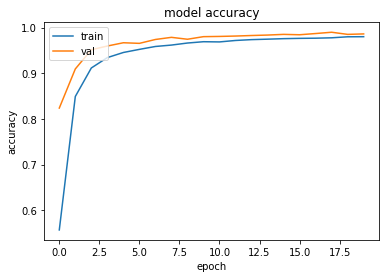

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='right')
plt.show()

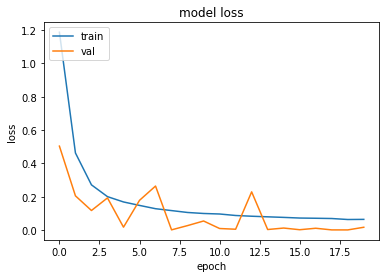

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
model.save('/content/drive/My Drive/kannadanumeral(Save).h5')
#model.save_weights('/content/drive/My Drive/kannadanumerals_weightsmain1.h5')

In [ ]:
from keras.models import load_model
model=load_model('/content/drive/My Drive/kannadanumeral(Save).h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.




In [ ]:
hist.history

In [ ]:
import pickle

# save:
f = open('history.pckl', 'wb')
pickle.dump(hist.history, f)
f.close()

# retrieve:    
f = open('history.pckl', 'rb')
history = pickle.load(f)
f.close()

AttributeError: ignored

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig('/content/drive/My Drive/a.jpg')

AttributeError: ignored

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig('/content/drive/My Drive/b.jpg')

In [ ]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 3s 311us/step


[0.06715115533308126, 0.980400025844574]

In [ ]:
model.evaluate(x_dig,y_dig)

10240/10240 [==============================] - 9s 852us/step


[0.718867998213318, 0.861621081829071]

In [ ]:
layer_name='dense_1'
layer_model=Model(inputs=model.input,outputs=model.get_layer(layer_name).output)

In [ ]:
fc=layer_model.predict(x_train)
print(fc.shape)

(54000, 1024)


In [ ]:
feature_col=[]
for i in range(1024):
  feature_col.append("f_"+str(i))

In [ ]:
train_features=pd.DataFrame(data=fc,columns=feature_col)
feature_col=np.array(feature_col)

In [ ]:
y_train1=np.argmax(y_train,axis=1)
y_test1=np.argmax(y_test,axis=1)
y_dig1=np.argmax(y_dig,axis=1)

In [ ]:
print(y_train1.shape)
print(y_test1.shape)
print(y_dig1.shape)

(54000,)
(10000,)
(10240,)


In [ ]:
print(y_train1[0])
print(y_train[0])

0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
from sklearn.svm import SVC
clf=SVC(degree=4,C=2.5,gamma='auto',kernel='rbf',decision_function_shape='ovo')
clf.fit(train_features,y_train1)

SVC(C=2.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=4, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
testfeatures=[]
testfeatures.append(layer_model.predict(x_test))#change to x_test for test
testfeatures=np.array(testfeatures) 

In [ ]:
testfeatures=np.squeeze(testfeatures,axis=0)
testfeatures.shape

(10000, 1024)

In [ ]:
test_features=pd.DataFrame(data=testfeatures,columns=feature_col)
feature_col=np.array(feature_col)

In [ ]:
pred=clf.predict(test_features)

In [ ]:
acc=clf.score(test_features,y_test1)

In [ ]:
print(acc)

0.9783


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier(n_neighbors=30,p=4)
k.fit(train_features,y_train1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=4,
                     weights='uniform')

In [ ]:
p=k.predict(test_features)

In [ ]:
accuracy=accuracy_score(y_test1,p)
print(accuracy)

0.978


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=500,min_samples_split=8,max_features=8)
rf.fit(train_features,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pr=rf.score(test_features,y_test)
print(pr)

0.9726


In [ ]:
labels = list(map(lambda x: 'C' + str(x), list(range(0,10)))) # change this accordingly for vowels
from sklearn.metrics import classification_report
print(classification_report(y_test1, pred, target_names=labels))

              precision    recall  f1-score   support

          C0       0.99      0.95      0.97      1000
          C1       0.95      0.99      0.97      1000
          C2       1.00      1.00      1.00      1000
          C3       0.99      0.99      0.99      1000
          C4       0.95      1.00      0.97      1000
          C5       1.00      0.96      0.98      1000
          C6       0.98      0.95      0.97      1000
          C7       0.98      0.96      0.97      1000
          C8       0.99      1.00      1.00      1000
          C9       0.96      0.99      0.98      1000

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



[0.62, 1.0, 0.76]
[0.93, 0.93, 0.93]
[0.59, 0.97, 0.73]
[0.47, 0.92, 0.62]
[1.0, 0.16, 0.28]
plotMat: [[0.62, 1.0, 0.76], [0.93, 0.93, 0.93], [0.59, 0.97, 0.73], [0.47, 0.92, 0.62], [1.0, 0.16, 0.28]]
support: [66, 40, 67, 272, 413]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:66: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:67: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:70: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.


ImportError: ignored

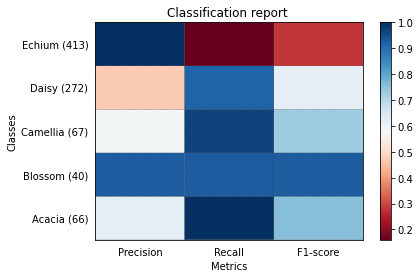

In [ ]:
def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: https://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    from itertools import izip
    pc.update_scalarmappable()
    ax = pc.get_axes()
    #ax = pc.axes# FOR LATEST MATPLOTLIB
    #Use zip BELOW IN PYTHON 3
    for p, color, value in izip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)


def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: https://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)


def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):
    '''
    Inspired by:
    - https://stackoverflow.com/a/16124677/395857 
    - https://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()    
    #c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    #fig.set_size_inches(cm2inch(40, 20))
    #fig.set_size_inches(cm2inch(40*4, 20*4))
    fig.set_size_inches(cm2inch(figure_width, figure_height))



def plot_classification_report(classification_report, title='Classification report ', cmap='RdBu'):
    '''
    Plot scikit-learn classification report.
    Extension based on https://stackoverflow.com/a/31689645/395857 
    '''
    lines = classification_report.split('\n')

    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[2 : (len(lines) - 2)]:
        t = line.strip().split()
        if len(t) < 2: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        print(v)
        plotMat.append(v)

    print('plotMat: {0}'.format(plotMat))
    print('support: {0}'.format(support))

    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)


def main():
    sampleClassificationReport = """             precision    recall  f1-score   support

          Acacia       0.62      1.00      0.76        66
          Blossom       0.93      0.93      0.93        40
          Camellia       0.59      0.97      0.73        67
          Daisy       0.47      0.92      0.62       272
          Echium       1.00      0.16      0.28       413

        avg / total       0.77      0.57      0.49       858"""


    plot_classification_report(sampleClassificationReport)
    plt.savefig('test_plot_classif_report.png', dpi=200, format='png', bbox_inches='tight')
    plt.close()

if __name__ == "__main__":
    main()
    #cProfile.run('main()') # if you want to do some profiling